In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../datasets/cardekho_dataset.csv")
print(data)

              car_name     brand     model  vehicle_age  km_driven  \
0          Maruti Alto    Maruti      Alto            9     120000   
1        Hyundai Grand   Hyundai     Grand            5      20000   
2          Hyundai i20   Hyundai       i20           11      60000   
3          Maruti Alto    Maruti      Alto            9      37000   
4        Ford Ecosport      Ford  Ecosport            6      30000   
...                ...       ...       ...          ...        ...   
15406      Hyundai i10   Hyundai       i10            9      10723   
15407    Maruti Ertiga    Maruti    Ertiga            2      18000   
15408      Skoda Rapid     Skoda     Rapid            6      67000   
15409  Mahindra XUV500  Mahindra    XUV500            5    3800000   
15410       Honda City     Honda      City            2      13000   

      seller_type fuel_type transmission_type  mileage  engine  max_power  \
0      Individual    Petrol            Manual    19.70     796      46.30   
1    

In [3]:
print("First 5 Rows of dataset:")
print(data.head())

First 5 Rows of dataset:
        car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000  


In [4]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB
None


In [5]:
data = data[data['km_driven'] <= 500000]
data = data[data['seats'] > 0]

print(f"Dataset shape after cleaning: {data.shape}")

Dataset shape after cleaning: (15397, 13)


In [6]:
print("Dataset Statistics(Numerical Features):")
print(data.describe())

Dataset Statistics(Numerical Features):
        vehicle_age      km_driven       mileage        engine     max_power  \
count  15397.000000   15397.000000  15397.000000  15397.000000  15397.000000   
mean       6.035916   54853.256024     19.703278   1485.811392    100.575621   
std        3.012285   36591.358499      4.171304    520.992525     42.976489   
min        0.000000     100.000000      4.000000    793.000000     38.400000   
25%        4.000000   30000.000000     17.000000   1197.000000     74.000000   
50%        6.000000   50000.000000     19.670000   1248.000000     88.500000   
75%        8.000000   70000.000000     22.700000   1582.000000    117.300000   
max       29.000000  500000.000000     33.540000   6592.000000    626.000000   

              seats  selling_price  
count  15397.000000   1.539700e+04  
mean       5.326038   7.748659e+05  
std        0.805335   8.943158e+05  
min        2.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50%        5.0000

In [7]:
print("Dataset Statictics(Categorical Features:)")
print(data.describe(include=['object']))

Dataset Statictics(Categorical Features:)
           car_name   brand  model seller_type fuel_type transmission_type
count         15397   15397  15397       15397     15397             15397
unique          121      32    120           3         5                 2
top     Hyundai i20  Maruti    i20      Dealer    Petrol            Manual
freq            906    4992    906        9527      7639             12214


In [8]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


In [9]:
print(f"Average Car Price: Rs.{data['selling_price'].mean():.2f}")
print(f"Most Common Model: {data['model'].mode()[0]}")
print(f"Most common Brand: {data['brand'].mode()[0]}")

Average Car Price: Rs.774865.94
Most Common Model: i20
Most common Brand: Maruti


### Univariate Analysis

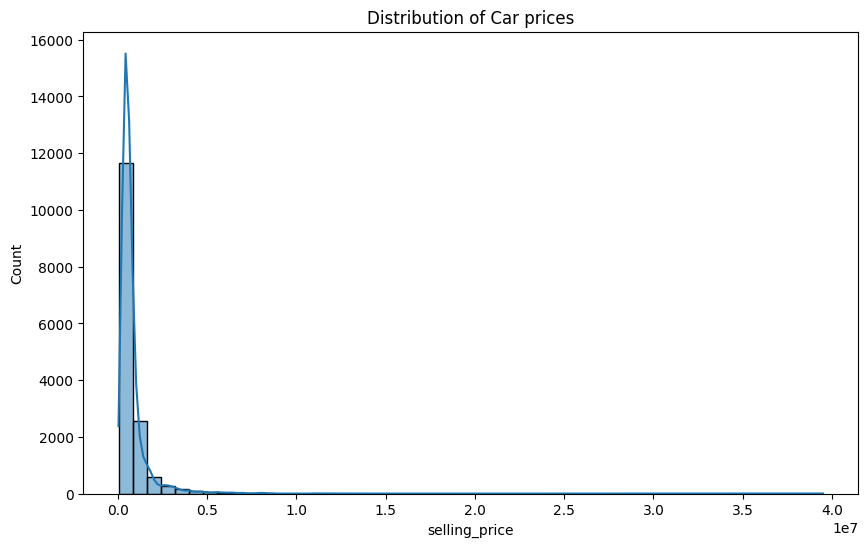

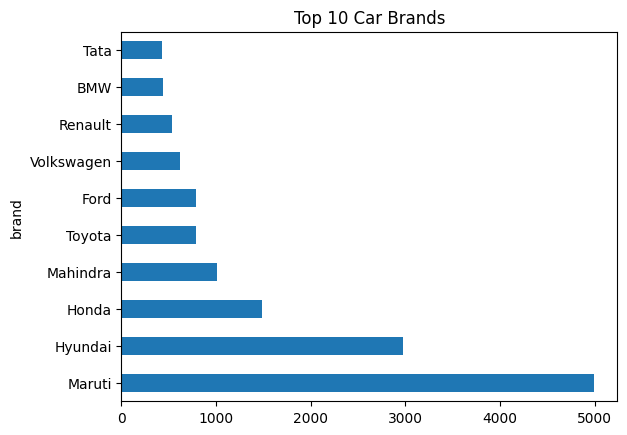

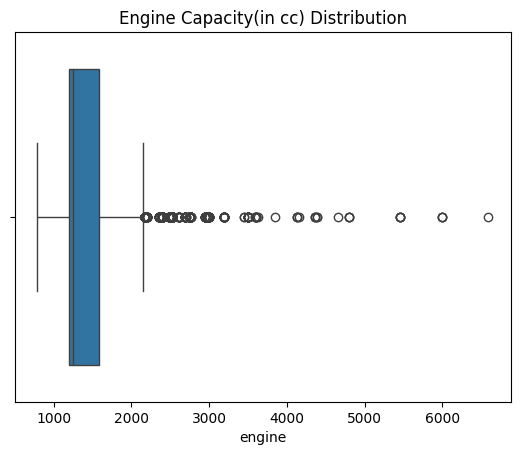

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data['selling_price'],bins=50,kde=True)
plt.title("Distribution of Car prices")
plt.show()

data['brand'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Car Brands")
plt.show()

sns.boxplot(x=data['engine'])
plt.title("Engine Capacity(in cc) Distribution")
plt.show()

### Bivariate Analysis

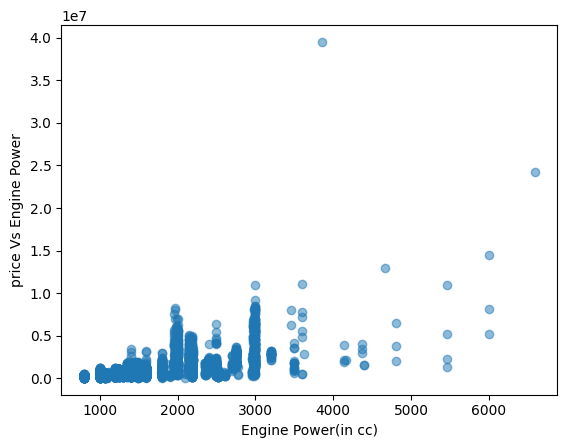

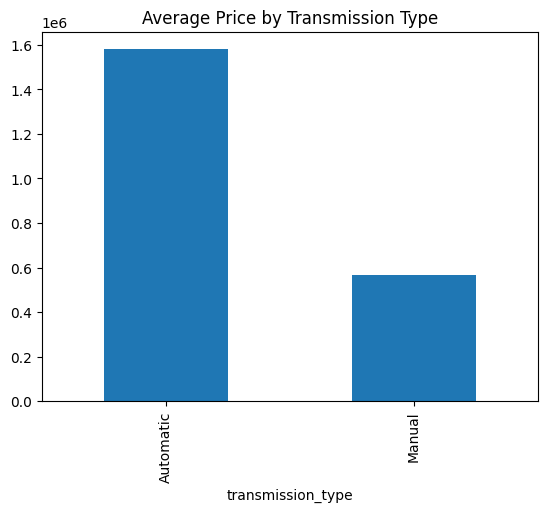

In [11]:
plt.scatter(data['engine'],data['selling_price'],alpha=0.5)
plt.xlabel('Engine Power(in cc)')
plt.ylabel('price Vs Engine Power')
plt.show()

data.groupby('transmission_type')['selling_price'].mean().plot(kind='bar')
plt.title("Average Price by Transmission Type")
plt.show()

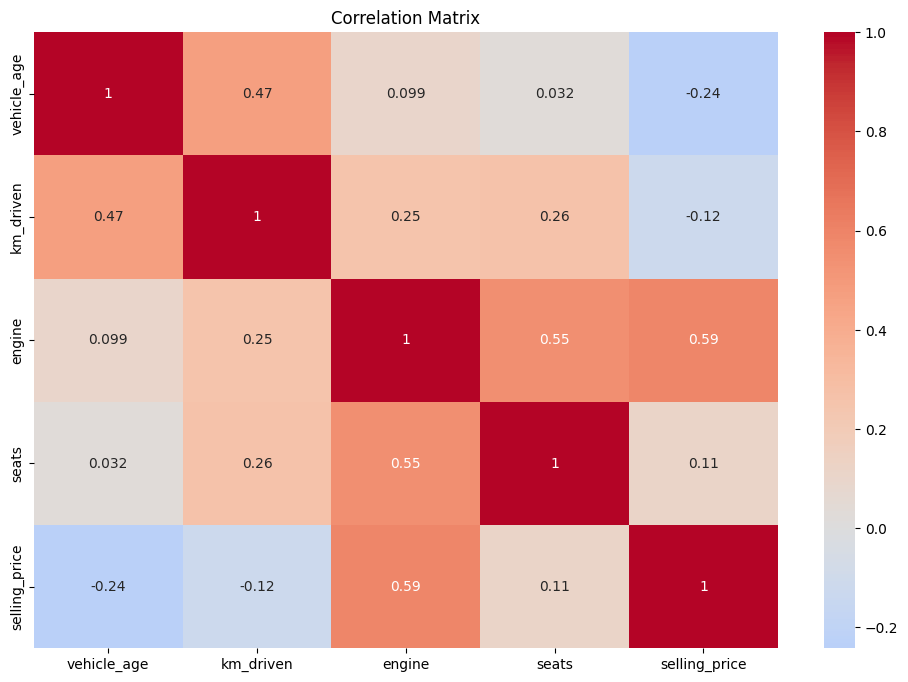

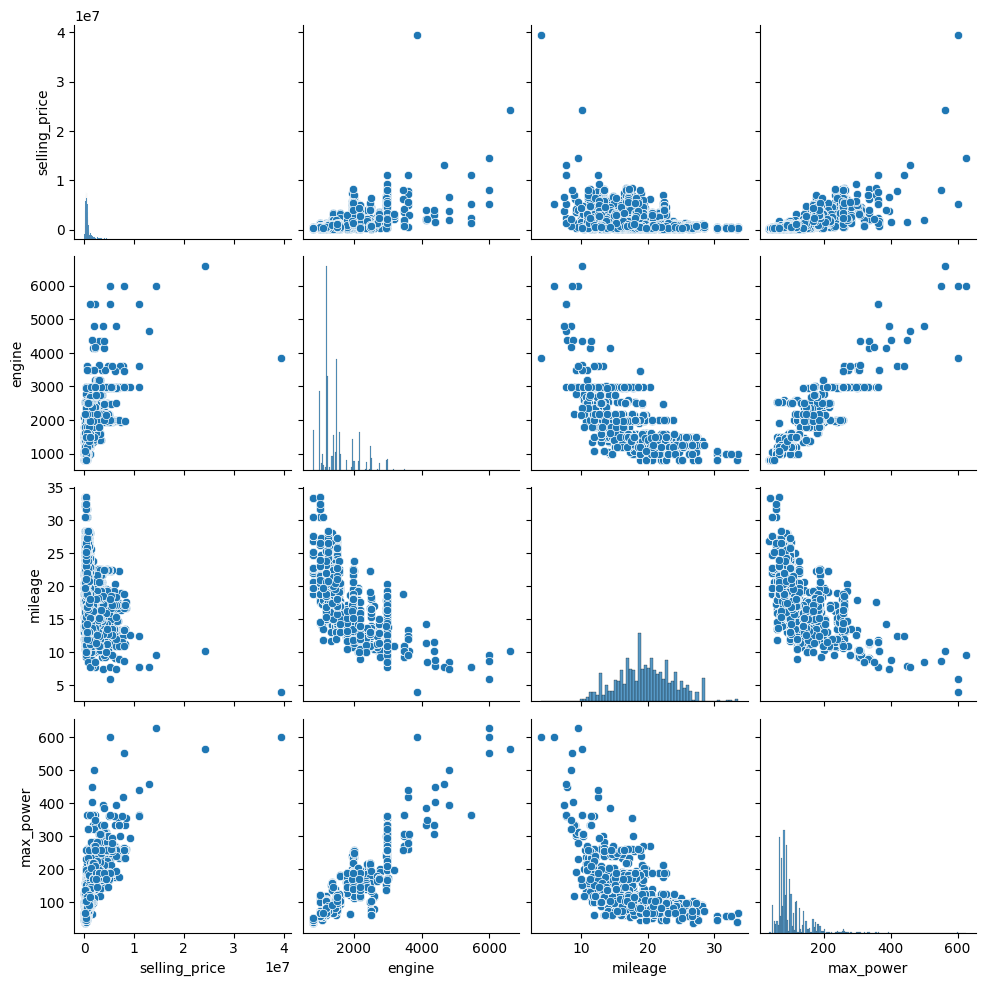

In [12]:
plt.figure(figsize=(12,8))
numerical_cols = data.select_dtypes(include=['int64']).columns
sns.heatmap(data[numerical_cols].corr(),annot=True,cmap='coolwarm',center=0)
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(data[['selling_price','engine','mileage','max_power']])
plt.show()

In [13]:
size_analysis = data.groupby('vehicle_age').agg({
    'selling_price': 'mean',
    'engine': 'mean',
    'mileage': 'mean',
    'max_power': 'mean'
}).round(2)
print(size_analysis)

             selling_price   engine  mileage  max_power
vehicle_age                                            
0               2230000.00  1476.60    21.14     121.26
1               1096977.38  1341.10    19.77      99.25
2               1141519.69  1416.04    19.91     102.17
3                977095.02  1415.00    20.86      98.01
4                951176.89  1450.72    20.53     100.38
5                818827.34  1421.85    20.64      98.39
6                728376.89  1487.19    20.25      98.57
7                699075.80  1543.24    19.81     102.07
8                625945.40  1576.25    19.16     104.55
9                591934.63  1612.24    18.26     106.82
10               496565.59  1604.11    17.63     106.13
11               426237.75  1574.27    16.94     103.09
12               318290.10  1488.22    17.08      97.67
13               278485.23  1489.68    16.84      92.37
14               260682.17  1628.99    16.26      95.56
15               188376.39  1430.07    16.67    

In [14]:
make_price = data.groupby('brand')['selling_price'].agg(['min','max','mean'])
print(make_price.sort_values('mean',ascending=False).head(10))

                   min       max          mean
brand                                         
Ferrari       39500000  39500000  3.950000e+07
Rolls-Royce   24200000  24200000  2.420000e+07
Bentley        5200000  14500000  9.266667e+06
Maserati       6000000   6200000  6.100000e+06
Porsche        2000000  11100000  5.161190e+06
Lexus          3990000   8000000  5.146500e+06
Mercedes-AMG   5100000   5100000  5.100000e+06
Land Rover     1275000   9200000  3.823902e+06
Volvo          1200000   8195000  3.729700e+06
BMW             465000   8500000  2.693827e+06


In [15]:
market_counts = data['seller_type'].value_counts().head(10)
print(market_counts)

seller_type
Dealer              9527
Individual          5697
Trustmark Dealer     173
Name: count, dtype: int64


In [16]:
X = data[['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats']]
y = np.log1p(data['selling_price'])

In [17]:
numerical_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
num_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy='median')),
    ("scaler",StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy='most_frequent')),
    ("encoder",OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num",num_pipe,numerical_cols),
    ("cat",cat_pipe,categorical_cols)
])

In [20]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
}

In [21]:
pipelines = {}

for model_name,model in models.items():
    pipelines[model_name] = Pipeline([
        ("preprocessor",preprocessor),
        ("model",model)
    ])

In [22]:
print("Evaluation:\n")

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred_log = pipeline.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{name} Metrics")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print()

Evaluation:

LinearRegression Metrics
R2 Score: 0.9184
MAE: 105345.7202

DecisionTree Metrics
R2 Score: 0.8150
MAE: 160621.3879

RandomForest Metrics
R2 Score: 0.9416
MAE: 91626.2152

XGBoost Metrics
R2 Score: 0.9411
MAE: 89673.5721



In [23]:
print("Cross Validation R2 Scores:\n")

for name,pipeline in pipelines.items():
    scores = cross_val_score(pipeline,X_train,y_train,cv=5,scoring="r2")
    print(f"{name}: {scores.mean():.4f}")

Cross Validation R2 Scores:

LinearRegression: 0.9271
DecisionTree: 0.8525
RandomForest: 0.9339
XGBoost: 0.9411


In [24]:
import joblib

joblib.dump(pipelines["RandomForest"],"used_car_price_predictor_rf_model.pkl")
joblib.dump(pipelines["XGBoost"],"used_car_price_predictor_xg_model.pkl")

['used_car_price_predictor_xg_model.pkl']

In [25]:
rf_param_grid = {
    "model__n_estimators": [250,500,750,1000],
    "model__max_depth": list(np.arange(5,30,7).tolist()) + [None],
    "model__min_samples_split": np.arange(2,20,4).tolist(),
    "model__min_samples_leaf": [2,4,6,8,10],
    "model__max_features": ["sqrt","log2",0.3,0.5,0.7]
}

rf_search = RandomizedSearchCV(
    pipelines["RandomForest"],
    rf_param_grid,
    n_iter=40,
    cv=5,
    verbose=2,
    random_state=42,
    scoring="r2",
    n_jobs=-1
)

rf_search.fit(X_train,y_train)
best_rf_model = rf_search.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [26]:
xg_param_grid = {
    "model__n_estimators": np.arange(300,1500,300).tolist(),
    "model__learning_rate": np.arange(0.01,0.3,0.07).tolist(),
    "model__max_depth": [3,5,7,9,11],
    "model__subsample": [0.6,0.8],
    "model__colsample_bytree": [0.5,0.7,0.9],
    "model__gamma": [0,2,4],
    "model__reg_alpha": np.arange(0,1,0.3).tolist(),
    "model__reg_lambda": np.arange(0,1,0.3).tolist()
}

xg_search = RandomizedSearchCV(
    pipelines["XGBoost"],
    xg_param_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    scoring="r2",
    n_jobs=-1
)

xg_search.fit(X_train,y_train)
best_xg_model = xg_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [27]:
tuned_models = {
    "TunedRandomForest": best_rf_model,
    "TunedXGBoost": best_xg_model
}

In [28]:
print("HyperParameter Tuning Evaluation:\n")

for name, tuned_model in tuned_models.items():
    y_pred_log = tuned_model.predict(X_test)

    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{name} Metrics")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print()

HyperParameter Tuning Evaluation:

TunedRandomForest Metrics
R2 Score: 0.9396
MAE: 92048.6522

TunedXGBoost Metrics
R2 Score: 0.9451
MAE: 88739.6042



In [29]:
print("Cross Validation R2 Scores for Tuned Models:\n")

for name,tuned_model in tuned_models.items():
    scores = cross_val_score(tuned_model,X_train,y_train,cv=5,scoring="r2")
    print(f"{name}: {scores.mean():.4f}")

Cross Validation R2 Scores for Tuned Models:

TunedRandomForest: 0.9385
TunedXGBoost: 0.9427


In [30]:
import joblib

joblib.dump(best_rf_model,"used_car_price_predictor_best_rf_model.pkl")
joblib.dump(best_xg_model,"used_car_price_predictor_best_xg_model.pkl")

['used_car_price_predictor_best_xg_model.pkl']